In [1]:
import torch
import torch.nn as nn
import math
import random
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
## Drawing Spiral lines ###
def draw_spiral_line(class_num, theta, length):
    distance = [(i*1000+200*random.random())/length for i in range(0, length)]
    fixed_theta = random.random()*3.14/2
    r = [500+i*random.random()*10/length for i in range(0, length)]
    
    # if class_num == 1:
    #     distance = [(i*1000+200*random.random())/length for i in range(0, length)]
    #     fixed_theta = random.random()*3.14/2
    #     r = [500+i*random.random()*10/length for i in range(0, length)] #Big spiral
    # else:
    #     distance = [(i*1000+200*random.random())/length for i in range(0, length)]
    #     fixed_theta = random.random()*3.14/2
    #     r = [500+i*random.random()*10/length for i in range(0, length)] #Small spiral
    return [[0] + [(distance[i]*math.cos(fixed_theta)) + (i*r[i])*math.cos(theta[i])/length+r[i]*(random.random()-0.5)*0.01 for i in range(1, length)], \
          [0] + [(distance[i]*math.sin(fixed_theta)) + (i*r[i])*math.sin(theta[i])/length+r[i]*(random.random()-0.5)*0.01 for i in range(1, length)], \
          [0] + [((distance[i])**1.5 + r[i]*0.5)*0.1 for i in range(1, length)]]

#Number of each to generate
class1 = 20000 #Q3 to Q1
class2 = 20000 #Q2 to Q4
length = 101
rot_angle = 4*3.14
dim = 3


theta1 = [rot_angle*i/length for i in range(0, length)]
theta2 = [rot_angle - rot_angle*i/length for i in range(0, length)]


lines1 = [draw_spiral_line(1, theta1, length) for i in range(0, class1)]
lines2 = [draw_spiral_line(2, theta2, length) for i in range(0, class2)]
labels = [0 for i in range(0, class1)] + [1 for i in range(0, class2)]

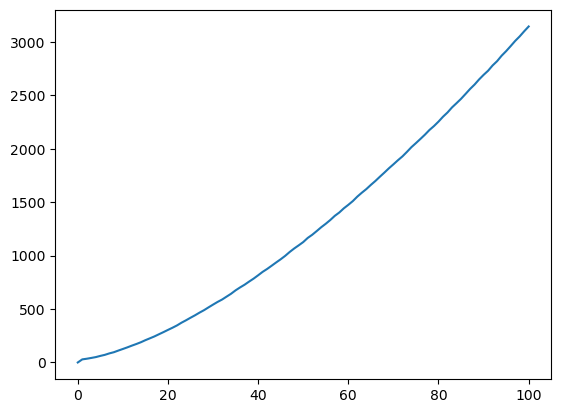

In [3]:
x=[i for i in range(0,length)]
# for i in range(0,length):
plt.plot(x,lines1[0][2])
plt.show() 

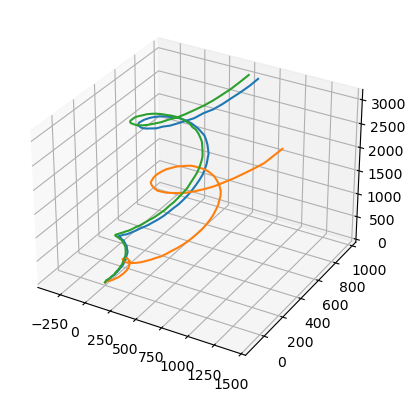

In [4]:
ax = plt.axes(projection='3d')
for i in range(3):
    ax.plot3D(lines1[i][0], lines1[i][1], lines1[i][2])

In [17]:
def delta_maker(lines):
    delta_lines = []
    for line in lines:
        new_line = []
        for line_dim in line:
            delta = []
            for i, item in enumerate(line_dim):
                if i == 0:
                    prev = item
                    continue
                delta.append(item-prev)
                prev = item
            new_line.append(delta)
        delta_lines.append(new_line)
    return delta_lines

In [18]:
# def rev_delta_cart_maker(lines):
#     newlines = []
#     for line in lines:
#         new_line = []
#         for line_dim in line:
#             delta = [0]
#             prev = 0
#             for i, item in enumerate(line_dim):
#                 delta.append(item+prev)
#                 prev = item+prev
#             new_line.append(delta)
#         newlines.append(new_line)
#     return newlines

In [19]:
# def plot_figures(generated_data, noise_labels):
    
#     for i, raw_data in enumerate(generated_data):
#         ax = plt.figure().add_subplot(projection='3d')
#         data = raw_data.detach().tolist()
#         x = data[0]
#         y = data[1]
#         z = data[2]
#         fixed_track = rev_delta_cart_maker([[x, y, z]])
#         if noise_labels[i].item() == 0:
#             ax.plot3D(fixed_track[0][0],fixed_track[0][1], fixed_track[0][2])
#             ax.set_title("Label 1")
#         else:
#             ax.plot3D(fixed_track[0][0],fixed_track[0][1], fixed_track[0][2])
#             ax.set_title("Label 2")
#         if i>2:
#             break
#     plt.show()


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [19]:
lines1_mod = delta_maker(lines1)
lines2_mod = delta_maker(lines2)
# replot1 = rev_delta_cart_maker(lines1_mod)
# replot2 = rev_delta_cart_maker(lines2_mod)

length = length - 1
lines1_arr = torch.tensor(lines1_mod)
lines2_arr = torch.tensor(lines2_mod)
features_vec = torch.cat((lines1_arr,lines2_arr),0)

labels_vec = torch.tensor(labels)

bsize = 50
test_size = 12
# dataloader = DataLoader(torch.load('dataset.pt'), batch_size=bsize, shuffle=True, drop_last=True, num_workers=5)
dataset = TensorDataset(features_vec,labels_vec)
dataloader = DataLoader(dataset,batch_size=bsize)

sample_data = next(iter(dataloader))

In [20]:
(sample_data)[0]

tensor([[[ 5.3383,  8.1709,  7.6273,  ..., 32.8156, 29.3478, 18.9579],
         [10.1064, 14.6404,  9.9632,  ..., 65.5830, 65.0370, 67.1466],
         [28.9718,  6.1155,  7.4712,  ..., 42.4099, 47.9219, 45.2157]],

        [[13.4895, 17.7011, 10.6393,  ..., 45.2645, 24.4621, 25.8334],
         [ 4.3594,  5.7640,  4.1913,  ..., 51.5342, 62.6886, 65.2422],
         [28.9631,  5.6556,  7.0649,  ..., 45.7037, 45.5067, 46.3910]],

        [[ 3.9364,  9.0667,  1.6105,  ..., 32.8158, 23.8613, 22.7752],
         [11.1255,  9.5736, 14.8179,  ..., 64.2493, 66.2588, 71.8136],
         [28.7461,  5.1864,  7.5401,  ..., 45.7103, 46.2740, 50.6585]],

        ...,

        [[15.4508, 11.6468, 13.9593,  ..., 36.6763, 31.4588, 27.5247],
         [ 4.8429,  7.8204, 10.4820,  ..., 60.8077, 58.0338, 67.0848],
         [28.1322,  6.4406,  7.7166,  ..., 44.5315, 52.0635, 39.8729]],

        [[11.6433, 11.1874,  7.3743,  ..., 31.2404, 28.5000, 24.5736],
         [10.1528,  9.9209,  9.3486,  ..., 63.9732, 61.

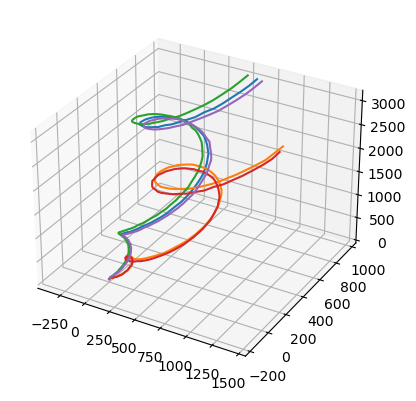

100
3
cuda
GPU Enabled
[0/150]: loss_d: 0.139, loss_g: 0.140


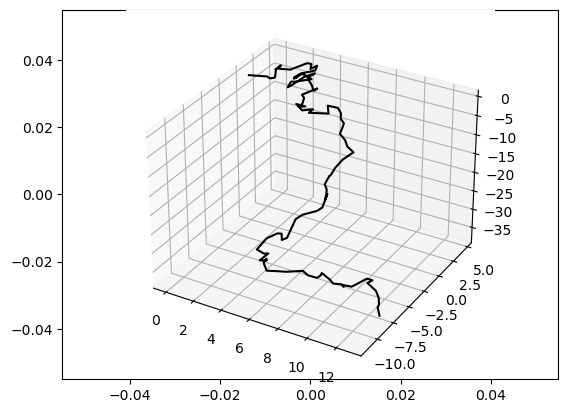

[5/150]: loss_d: 0.072, loss_g: 0.465


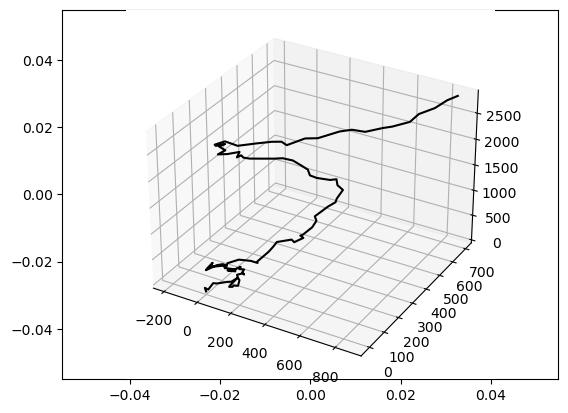

[10/150]: loss_d: 0.064, loss_g: 0.314


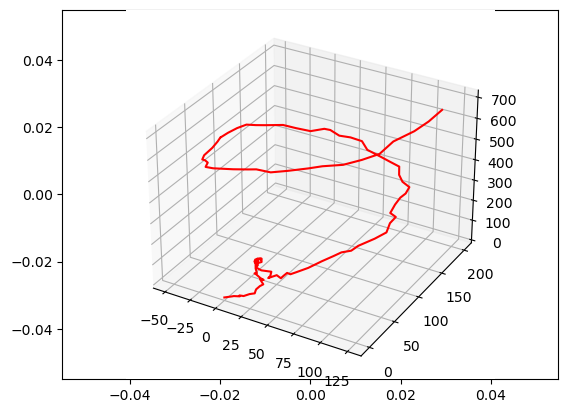

[15/150]: loss_d: 0.061, loss_g: 0.308


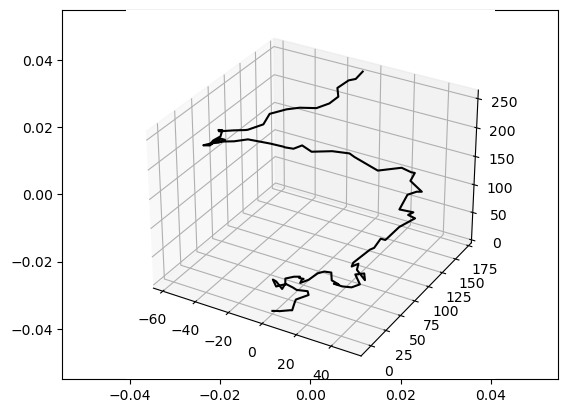

[20/150]: loss_d: 0.059, loss_g: 0.330


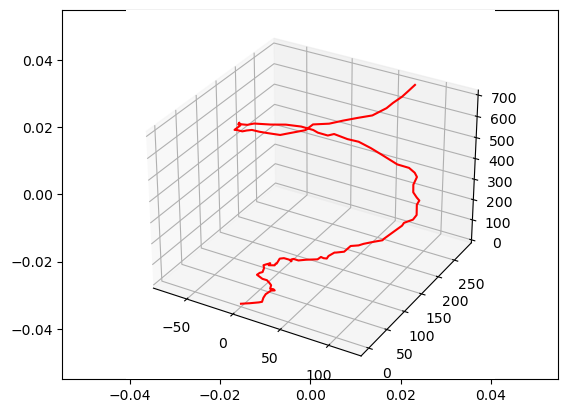

[25/150]: loss_d: 0.058, loss_g: 0.318


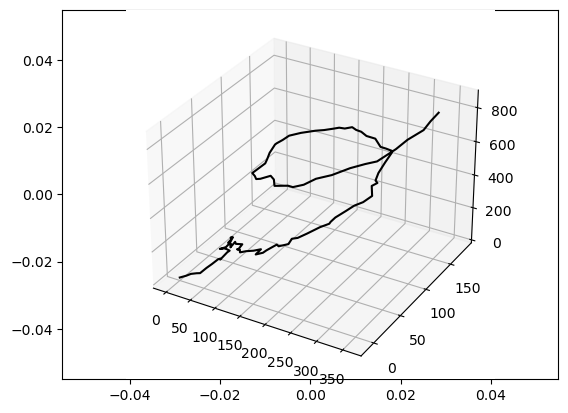

[30/150]: loss_d: 0.059, loss_g: 0.352


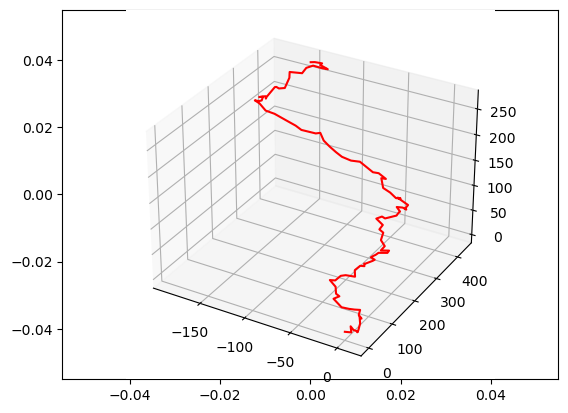

[35/150]: loss_d: 0.408, loss_g: 0.686


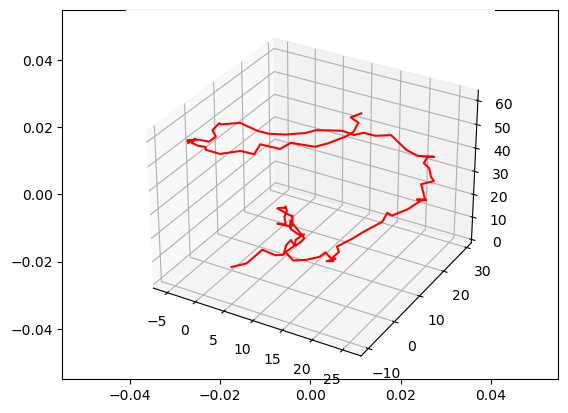

[40/150]: loss_d: 0.056, loss_g: 0.384


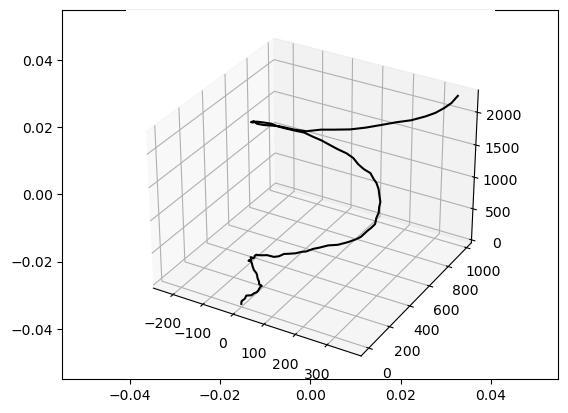

[45/150]: loss_d: 0.059, loss_g: 0.458


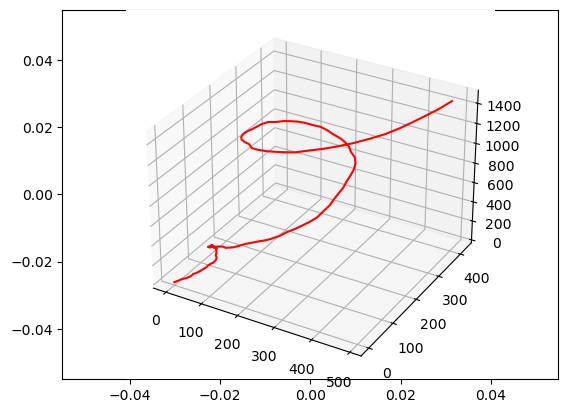

KeyboardInterrupt: 

In [25]:
# def delta_maker(line):
#     new_line = []
#     line_dim = len(line[0])
#     line_length = len(line)
    
#     line = line.tolist()
    
#     for i in range(0, line_dim):
#         delta = []
#         for j in range(0, line_length):
#             if j == 0:
#                 prev = line[j][i]
#                 continue
#             delta.append(line[j][i]-prev)
#             prev = line[j][i]
#         new_line.append(delta)
#     return torch.Tensor(new_line)

def rev_delta_maker(line):
    new_line = []
    for line_dim in line:
        delta = [0]
        prev = 0
        for i, item in enumerate(line_dim):
            delta.append(float(item+prev))
            prev = item+prev
        new_line.append(delta)
    return new_line

# class TrajectoryDataset(Dataset):
#     def __init__(self, data_arr, label_arr, transform=None, target_transform=None):
#         self.data_arr = data_arr
#         self.label_arr = label_arr
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.label_arr)

#     def __getitem__(self, idx):
#         trajectory = self.data_arr[idx]
#         label = self.label_arr[idx]
        
#         trajectory = delta_maker(trajectory)

#         if self.target_transform:
#             label = self.target_transform(label)
#         return trajectory, label

lines1_mod = delta_maker(lines1)
lines2_mod = delta_maker(lines2)
# replot1 = rev_delta_cart_maker(lines1_mod)
# replot2 = rev_delta_cart_maker(lines2_mod)

length = length - 1
lines1_arr = torch.tensor(lines1_mod)
lines2_arr = torch.tensor(lines2_mod)
features_vec = torch.cat((lines1_arr,lines2_arr),0)

labels_vec = torch.tensor(labels)

bsize = 50
test_size = 12
# dataloader = DataLoader(torch.load('dataset.pt'), batch_size=bsize, shuffle=True, drop_last=True, num_workers=5)
dataset = TensorDataset(features_vec,labels_vec)
dataloader = DataLoader(dataset,batch_size=bsize)

sample_data = next(iter(dataloader))
plt.figure(1)
ax = plt.axes(projection='3d')

for i in range(5):
    line = rev_delta_maker(sample_data[0][i])
    X, Y, Z = line[0], line[1], line[2]
    ax.plot3D(X, Y, Z)  # Plot contour curves

plt.show()

def plot_figures(generated_data, noise_labels):
    fig = plt.plot()
    ax = plt.axes(projection='3d')
    colors = ['k', 'r', 'b']
    for i, raw_data in enumerate(generated_data):
        data = raw_data.detach().tolist()
        fixed_track = rev_delta_maker(data)
        if noise_labels[i] <= 2:
            ax.plot3D(fixed_track[0],fixed_track[1],fixed_track[2], color = colors[noise_labels[i]])
        if i==0:
            break
    plt.show()

length = len(sample_data[0][0][0])
dim = len(sample_data[0][0][:,0])

print(length)
print(dim)

n_classes = 2 #Fix manually...
out_shape = (length,dim)
output_dim = length*dim

cuda = True if torch.cuda.is_available() else False


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.noise1 = nn.Sequential(
            nn.Linear((3*dim)**2, 400),
            nn.BatchNorm1d(400),
            nn.ReLU()
        )

        self.noise2 = nn.Sequential(
            nn.Linear(400, 1300),
            nn.BatchNorm1d(1300),
            nn.ReLU(),
        )

        self.label1 = nn.Sequential(
            nn.Linear(n_classes, 10),
            nn.BatchNorm1d(10),
            nn.ReLU()
        )

        self.label2 = nn.Sequential(
            nn.Linear(10, 200),
            nn.BatchNorm1d(200),
            nn.ReLU(),
        )
        
        self.hidden_layer3 = nn.Sequential(
            nn.Conv1d(dim, dim*10, 5, stride = 1, padding = 2),
            nn.Linear(int(1500/dim), 200),
            nn.Upsample(scale_factor = 2, mode='linear'),
            nn.BatchNorm1d(dim*10, affine=False),
            nn.ReLU()
        )
        
        
        
        self.hidden_layer4 = nn.Sequential(
            nn.Conv1d(dim*10, dim*5, 5, stride = 1, padding = 2),
            nn.Linear(400, 100),
            nn.Upsample(scale_factor = 2, mode='linear'),
            nn.BatchNorm1d(dim*5, affine=False),
            nn.ReLU()
        )
        
        self.hidden_layer5 = nn.Sequential(
            nn.Conv1d(dim*5, dim*5, 5, stride = 1, padding = 2),
            nn.Linear(200, 200),
        )

        self.hidden_layer6 = nn.Sequential(
            nn.Conv1d(dim*5, dim*1, 5, stride = 1, padding = 2),
            nn.Linear(200, length),
        )
        

    def forward(self, noise, labels):        
        c = nn.functional.one_hot(labels, num_classes = n_classes).to(torch.float32)
        noise = noise.flatten(start_dim=1)
        
        n_output = self.noise1(noise)
        n_output = self.noise2(n_output)
        
        l_output = self.label1(c)
        l_output = self.label2(l_output)
        
        inp = torch.cat([n_output, l_output], 1)
        output = inp.reshape(len(labels), dim, -1)
        
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        output = self.hidden_layer5(output)
        output = self.hidden_layer6(output)

        return output

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(length, 200),
            nn.Conv1d(dim, dim*20, 5, stride = 1, padding = 2),
            nn.LeakyReLU(0.05),
            nn.Dropout(0.05)
        )
        self.hidden_layer2 = nn.Sequential(
            nn.Conv1d(dim*20, dim*5, 5, stride = 1, padding = 2),
            nn.Linear(200, 150),
            nn.LeakyReLU(0.05),
            nn.Dropout(0.05)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Conv1d(dim*5, dim, 5, stride = 1, padding = 2),
            nn.Linear(150, 50),
            nn.LeakyReLU(0.05),
            nn.Dropout(0.05)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(50*dim + n_classes, 30),
            nn.LeakyReLU(0.05),
            #nn.Dropout(0.2)
        )
        
        self.hidden_layer5 = nn.Sequential(
            nn.Linear(30, 30),
            nn.LeakyReLU(0.05),
            #nn.Dropout(0.2)
        )
        
        self.hidden_layer6 = nn.Sequential(
            nn.Linear(30, 1),
            nn.Sigmoid()
        )
        

    def forward(self, inp, labels):
        c = nn.functional.one_hot(labels, num_classes = n_classes)
        inp = inp.reshape(-1, dim, length)
        output = self.layer1(inp)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        
        #Flatten layer occurs here
        output = torch.cat([output.flatten(start_dim=1), c], 1)
        output = output[:, None,:]
        output = self.hidden_layer4(output)
        output = self.hidden_layer5(output)
        output = self.hidden_layer6(output)
        
        output = output.squeeze(-1)
        return output.to(device)
        # Concatenate label embedding and image to produce input
        # d_in = torch.cat((inp.view(inp.size(0), -1), self.label_embedding(labels)), -1).flatten().long()
        # print(d_in.shape)
        # validity = self.model(d_in)
        # return validity


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

adversarial_loss = torch.nn.MSELoss()
generator = Generator()
discriminator = Discriminator()

if str(device) == "cuda":
    print("GPU Enabled")
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.00001, betas=(0.5,0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.00001, betas=(0.5,0.999))

n_epochs = 150

FloatTensor = torch.cuda.FloatTensor if device == "cuda" else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if device == "cuda" else torch.LongTensor

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(dataloader):
        #Adversarial ground truths
        valid = torch.autograd.Variable(FloatTensor(bsize, 1).fill_(0.9), requires_grad=False).to(device)
        fake = torch.autograd.Variable(FloatTensor(bsize, 1).fill_(0.0), requires_grad=False).to(device)
        
        #Real Input
        real_tracks = data_input[0]
        real_labels = data_input[1]
                
        ### Training Generator ###
        optimizer_G.zero_grad()

        noise = torch.randn((bsize, 3*dim, 3*dim)).to(device)
        noise_labels = torch.randint(0, 2, (bsize,)).to(device)
        generated_data = generator(noise, noise_labels)
        
        #Update the generator loss function based on its ability to trick
        validity = discriminator(generated_data, noise_labels)
        g_loss = adversarial_loss(validity, valid)
        
        g_loss.backward()
        optimizer_G.step()
        
        ### Training Discriminator ###
        
        mreal_track = real_tracks.to(device) 
        mreal_labels = real_labels.to(device)
        
        # Clear optimizer gradients        
        optimizer_D.zero_grad()
        # Forward pass with true data as input
        validity_real = discriminator(mreal_track,mreal_labels)
        d_real_loss = adversarial_loss(validity_real, valid)
        validity_fake = discriminator(generated_data.detach(),noise_labels)
        d_fake_loss = adversarial_loss(validity_fake, fake)

        # Average the loss
        d_loss = (
            d_real_loss + d_fake_loss
        ) / 2
        
        d_loss.backward()
        #print(d_loss)
        if d_loss.data.item()*5 > g_loss.data.item():
            optimizer_D.step()
        #optimizer_D.step()
        
        # Clear optimizer gradients

        G_loss.append(g_loss.data.item())

    if (epoch_idx)%5 == 0:
        print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(d_loss.to("cpu"))), torch.mean(torch.FloatTensor(g_loss.to("cpu")))))
        with torch.no_grad():    
            noise = torch.randn((bsize, 3*dim, 3*dim)).to(device)
            noise_labels = torch.randint(0, 2, (bsize,)).to(device)
            gen_samp = generator(noise,noise_labels)
            plot_figures(gen_samp,noise_labels)

# torch.save(generator.state_dict(), "generator.h5")
# torch.save(discriminator.state_dict(), "discriminator.h5")

In [14]:
generated_data.detach.shape


AttributeError: 'builtin_function_or_method' object has no attribute 'shape'

In [ ]:
plot_figures(generated_data,noise_labels)


In [ ]:
(sample_data)[0][0][0].shape

In [ ]:
len(sample_data[0][0][:,0])

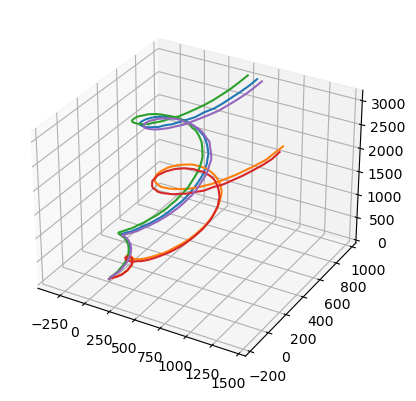

101
3
cuda
GPU Enabled
[0/150]: loss_d: 0.115, loss_g: 0.179


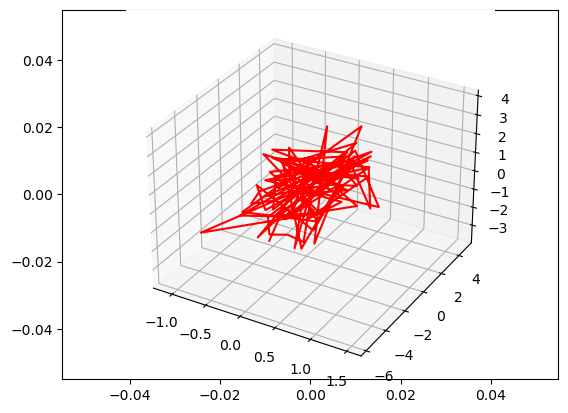

[5/150]: loss_d: 0.052, loss_g: 0.344


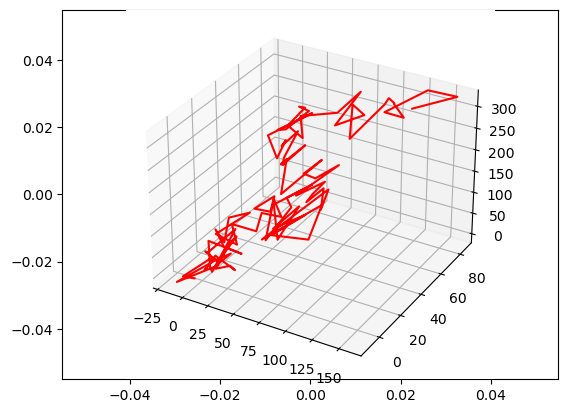

[10/150]: loss_d: 0.053, loss_g: 0.398


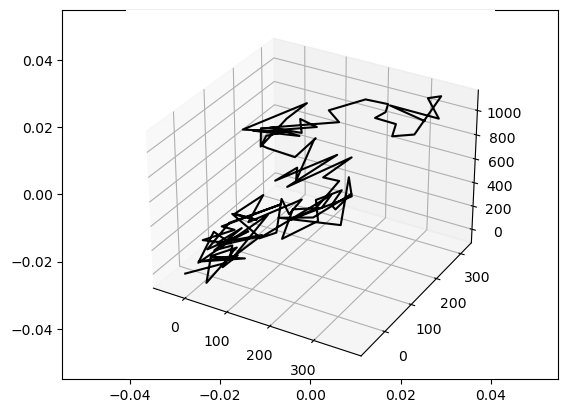

[15/150]: loss_d: 0.051, loss_g: 0.364


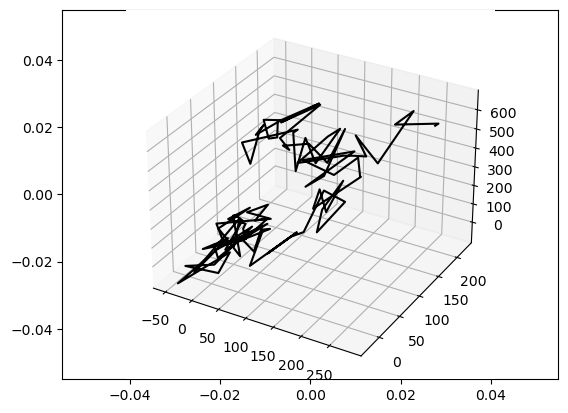

[20/150]: loss_d: 0.068, loss_g: 0.450


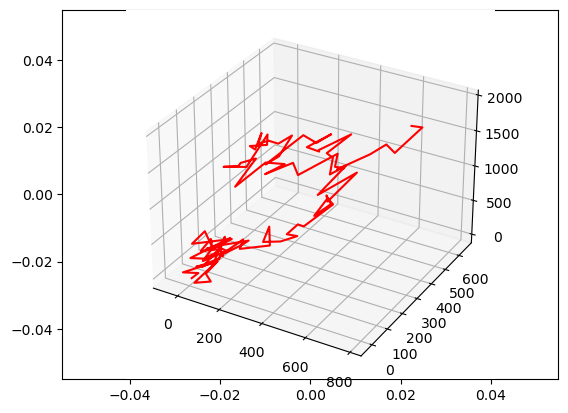

[25/150]: loss_d: 0.060, loss_g: 0.601


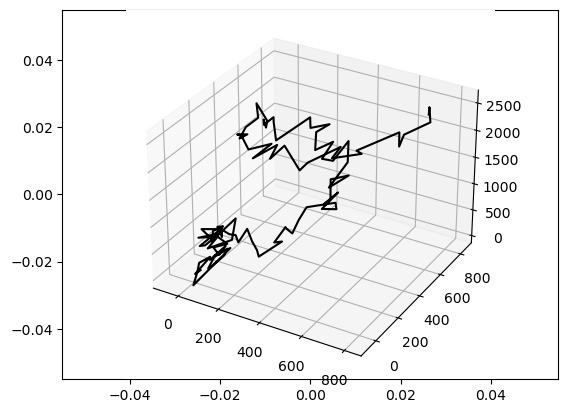

[30/150]: loss_d: 0.075, loss_g: 0.524


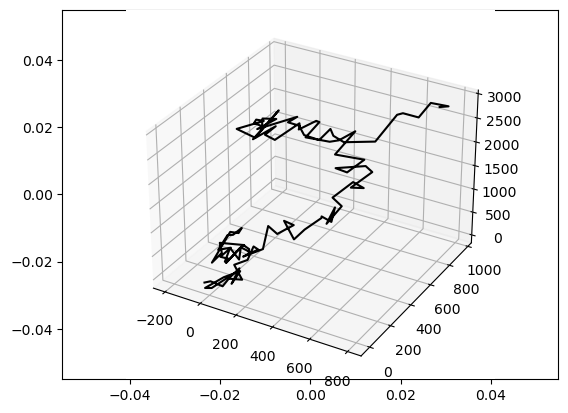

[35/150]: loss_d: 0.059, loss_g: 0.505


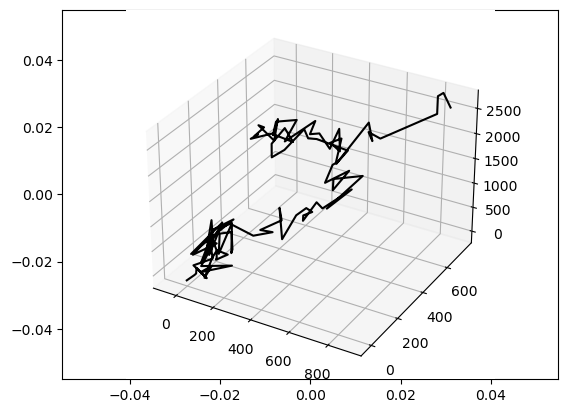

[40/150]: loss_d: 0.056, loss_g: 0.406


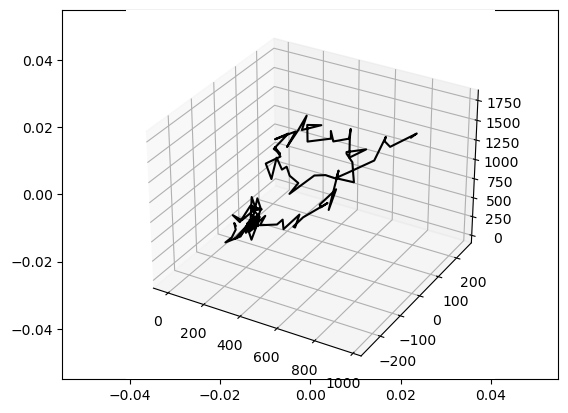

[45/150]: loss_d: 0.025, loss_g: 0.585


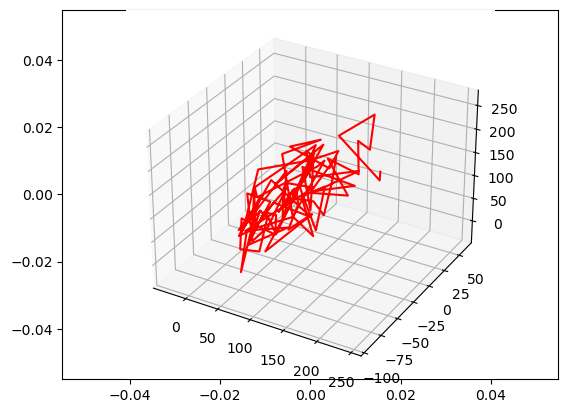

[50/150]: loss_d: 0.085, loss_g: 0.428


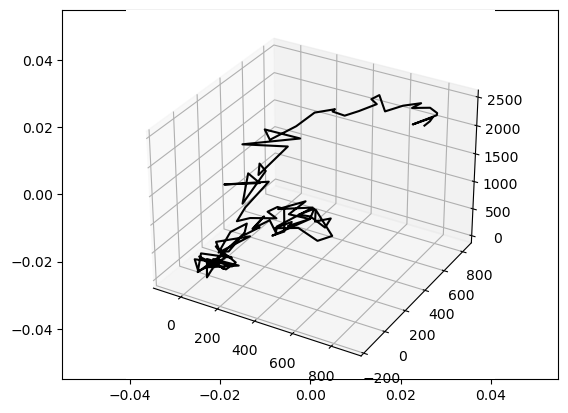

In [ ]:
# lines1_mod = delta_maker(lines1)
# lines2_mod = delta_maker(lines2)
# replot1 = rev_delta_cart_maker(lines1_mod)
# replot2 = rev_delta_cart_maker(lines2_mod)


lines1_arr = torch.tensor(lines1)
lines2_arr = torch.tensor(lines2)
features_vec = torch.cat((lines1_arr,lines2_arr),0)

labels_vec = torch.tensor(labels)

bsize = 50
test_size = 12
# dataloader = DataLoader(torch.load('dataset.pt'), batch_size=bsize, shuffle=True, drop_last=True, num_workers=5)
dataset = TensorDataset(features_vec,labels_vec)
dataloader = DataLoader(dataset,batch_size=bsize)

sample_data = next(iter(dataloader))
plt.figure(1)
ax = plt.axes(projection='3d')

for i in range(5):
    line = (sample_data[0][i])
    X, Y, Z = line[0], line[1], line[2]
    ax.plot3D(X, Y, Z)  # Plot contour curves

plt.show()

def plot_figures_nodelta(generated_data, noise_labels):
    fig = plt.plot()
    ax = plt.axes(projection='3d')
    colors = ['k', 'r', 'b']
    for i, raw_data in enumerate(generated_data):
        data = raw_data
        fixed_track = (data).cpu()
        if noise_labels[i] <= 2:
            ax.plot3D(fixed_track[0],fixed_track[1],fixed_track[2], color = colors[noise_labels[i]])
        if i==0:
            break
    plt.show()

length = len(sample_data[0][0][0])
dim = len(sample_data[0][0][:,0])

print(length)
print(dim)

n_classes = 2 #Fix manually...
out_shape = (length,dim)
output_dim = length*dim

cuda = True if torch.cuda.is_available() else False

length = len(sample_data[0][0][0])
dim = len(sample_data[0][0][:,0])


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.noise1 = nn.Sequential(
            nn.Linear((3*dim)**2, 400),
            nn.BatchNorm1d(400),
            nn.ReLU()
        )

        self.noise2 = nn.Sequential(
            nn.Linear(400, 1300),
            nn.BatchNorm1d(1300),
            nn.ReLU(),
        )

        self.label1 = nn.Sequential(
            nn.Linear(n_classes, 10),
            nn.BatchNorm1d(10),
            nn.ReLU()
        )

        self.label2 = nn.Sequential(
            nn.Linear(10, 200),
            nn.BatchNorm1d(200),
            nn.ReLU(),
        )
        
        self.hidden_layer3 = nn.Sequential(
            nn.Conv1d(dim, dim*10, 5, stride = 1, padding = 2),
            nn.Linear(int(1500/dim), 200),
            nn.Upsample(scale_factor = 2, mode='linear'),
            nn.BatchNorm1d(dim*10, affine=False),
            nn.ReLU()
        )
        
        
        
        self.hidden_layer4 = nn.Sequential(
            nn.Conv1d(dim*10, dim*5, 5, stride = 1, padding = 2),
            nn.Linear(400, 100),
            nn.Upsample(scale_factor = 2, mode='linear'),
            nn.BatchNorm1d(dim*5, affine=False),
            nn.ReLU()
        )
        
        self.hidden_layer5 = nn.Sequential(
            nn.Conv1d(dim*5, dim*5, 5, stride = 1, padding = 2),
            nn.Linear(200, 200),
        )

        self.hidden_layer6 = nn.Sequential(
            nn.Conv1d(dim*5, dim*1, 5, stride = 1, padding = 2),
            nn.Linear(200, length),
        )
        

    def forward(self, noise, labels):        
        c = nn.functional.one_hot(labels, num_classes = n_classes).to(torch.float32)
        noise = noise.flatten(start_dim=1)
        
        n_output = self.noise1(noise)
        n_output = self.noise2(n_output)
        
        l_output = self.label1(c)
        l_output = self.label2(l_output)
        
        inp = torch.cat([n_output, l_output], 1)
        output = inp.reshape(len(labels), dim, -1)
        
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        output = self.hidden_layer5(output)
        output = self.hidden_layer6(output)

        return output

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(length, 200),
            nn.Conv1d(dim, dim*20, 5, stride = 1, padding = 2),
            nn.LeakyReLU(0.05),
            nn.Dropout(0.05)
        )
        self.hidden_layer2 = nn.Sequential(
            nn.Conv1d(dim*20, dim*5, 5, stride = 1, padding = 2),
            nn.Linear(200, 150),
            nn.LeakyReLU(0.05),
            nn.Dropout(0.05)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Conv1d(dim*5, dim, 5, stride = 1, padding = 2),
            nn.Linear(150, 50),
            nn.LeakyReLU(0.05),
            nn.Dropout(0.05)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(50*dim + n_classes, 30),
            nn.LeakyReLU(0.05),
            #nn.Dropout(0.2)
        )
        
        self.hidden_layer5 = nn.Sequential(
            nn.Linear(30, 30),
            nn.LeakyReLU(0.05),
            #nn.Dropout(0.2)
        )
        
        self.hidden_layer6 = nn.Sequential(
            nn.Linear(30, 1),
            nn.Sigmoid()
        )
        

    def forward(self, inp, labels):
        c = nn.functional.one_hot(labels, num_classes = n_classes)
        inp = inp.reshape(-1, dim, length)
        output = self.layer1(inp)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        
        #Flatten layer occurs here
        output = torch.cat([output.flatten(start_dim=1), c], 1)
        output = output[:, None,:]
        output = self.hidden_layer4(output)
        output = self.hidden_layer5(output)
        output = self.hidden_layer6(output)
        
        output = output.squeeze(-1)
        return output.to(device)
        # Concatenate label embedding and image to produce input
        # d_in = torch.cat((inp.view(inp.size(0), -1), self.label_embedding(labels)), -1).flatten().long()
        # print(d_in.shape)
        # validity = self.model(d_in)
        # return validity


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

adversarial_loss_nodelta = torch.nn.MSELoss()
generator_nodelta = Generator()
discriminator_nodelta = Discriminator()

if str(device) == "cuda":
    print("GPU Enabled")
    generator_nodelta.cuda()
    discriminator_nodelta.cuda()
    adversarial_loss_nodelta.cuda()

# Optimizers
optimizer_G = torch.optim.Adam(generator_nodelta.parameters(), lr=0.00001, betas=(0.5,0.999))
optimizer_D = torch.optim.Adam(discriminator_nodelta.parameters(), lr=0.00001, betas=(0.5,0.999))

n_epochs = 150

FloatTensor = torch.cuda.FloatTensor if device == "cuda" else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if device == "cuda" else torch.LongTensor

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(dataloader):
        #Adversarial ground truths
        valid = torch.autograd.Variable(FloatTensor(bsize, 1).fill_(0.9), requires_grad=False).to(device)
        fake = torch.autograd.Variable(FloatTensor(bsize, 1).fill_(0.0), requires_grad=False).to(device)
        
        #Real Input
        real_tracks = data_input[0]
        real_labels = data_input[1]
                
        ### Training Generator ###
        optimizer_G.zero_grad()

        noise = torch.randn((bsize, 3*dim, 3*dim)).to(device)
        noise_labels = torch.randint(0, 2, (bsize,)).to(device)
        generated_data = generator_nodelta(noise, noise_labels)
        
        #Update the generator loss function based on its ability to trick
        validity = discriminator_nodelta(generated_data, noise_labels)
        g_loss = adversarial_loss_nodelta(validity, valid)
        
        g_loss.backward()
        optimizer_G.step()
        
        ### Training Discriminator ###
        
        mreal_track = real_tracks.to(device) 
        mreal_labels = real_labels.to(device)
        
        # Clear optimizer gradients        
        optimizer_D.zero_grad()
        # Forward pass with true data as input
        validity_real = discriminator_nodelta(mreal_track,mreal_labels)
        d_real_loss = adversarial_loss_nodelta(validity_real, valid)
        validity_fake = discriminator_nodelta(generated_data.detach(),noise_labels)
        d_fake_loss = adversarial_loss_nodelta(validity_fake, fake)

        # Average the loss
        d_loss = (
            d_real_loss + d_fake_loss
        ) / 2
        
        d_loss.backward()
        #print(d_loss)
        if d_loss.data.item()*5 > g_loss.data.item():
            optimizer_D.step()
        #optimizer_D.step()
        
        # Clear optimizer gradients

        G_loss.append(g_loss.data.item())

    if (epoch_idx)%5 == 0:
        print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(d_loss.to("cpu"))), torch.mean(torch.FloatTensor(g_loss.to("cpu")))))
        with torch.no_grad():    
            noise = torch.randn((bsize, 3*dim, 3*dim)).to(device)
            noise_labels = torch.randint(0, 2, (bsize,)).to(device)
            gen_samp = generator_nodelta(noise,noise_labels)
            plot_figures_nodelta(gen_samp,noise_labels)

# torch.save(generator.state_dict(), "generator.h5")
# torch.save(discriminator.state_dict(), "discriminator.h5")